# Battery Consumption Measurements
- Battery is 1200mAh
- Battery is 3.7V
- MCU is using 3.3v

## Test #1 - Basic `Feather9x_Rx.ino` 
> This sketch was used in testing. It constantly waits for something to be recieved, then instantly sends an acknowledgement back.

In [10]:
import csv
import matplotlib.pyplot as plt

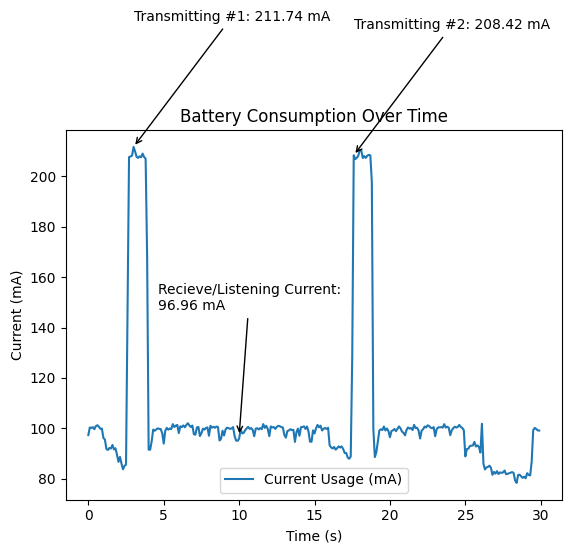

Average Current Usage: 105.83 mA
Estimated Runtime: 11.34 hours (40821.68 seconds)


In [33]:
# Read the CSV file
time = []
current_usage = []

with open('battery_consumption_basic.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header
    for row in reader:
        time.append(float(row[0]))  # Assuming time is in the first column
        current_usage.append(float(row[1])*1000)  # Assuming current usage is in the second column
# Plot the data
plt.plot(time, current_usage, label='Current Usage (mA)')

peaks = [i for i in range(1, len(current_usage)-1) if current_usage[i-1] < current_usage[i] > current_usage[i+1] and current_usage[i] > 200]
for i in range(len(peaks)-1):
    if current_usage[peaks[i]] > 200 and current_usage[peaks[i+1]] > 200:
        # Annotate the first peak
        plt.annotate(f'Transmitting #1: {current_usage[peaks[i]]:.2f} mA', xy=(time[peaks[i]], current_usage[peaks[i]]), xytext=(time[peaks[i]], current_usage[peaks[i]]+50),
                     arrowprops=dict(facecolor='black', arrowstyle='->'))
        break
for i in range(len(peaks)-1):
    if current_usage[peaks[i]] > 200 and time[peaks[i]] > 10:
        # Annotate the second peak
        plt.annotate(f'Transmitting #2: {current_usage[peaks[i]]:.2f} mA', xy=(time[peaks[i]], current_usage[peaks[i]]), xytext=(time[peaks[i]], current_usage[peaks[i]]+50),
                     arrowprops=dict(facecolor='black', arrowstyle='->'))
        break

#Make an annotation for the average between current at 5 and 15 seconds
average_current = sum(current_usage[5:15]) / len(current_usage[5:15])
plt.annotate(f'Recieve/Listening Current:\n{average_current:.2f} mA', xy=(10, average_current), xytext=(4.6, average_current+50),
             arrowprops=dict(facecolor='black', arrowstyle='->'))


plt.xlabel('Time (s)')
plt.ylabel('Current (mA)')
plt.title('Battery Consumption Over Time')
plt.legend()
plt.show()

# Calculate runtime
average_current = sum(current_usage) / len(current_usage)
battery_capacity_mAh = 1200  # mAh
runtime_hours = battery_capacity_mAh / average_current
runtime_seconds = runtime_hours * 3600

print(f"Average Current Usage: {average_current:.2f} mA")
print(f"Estimated Runtime: {runtime_hours:.2f} hours ({runtime_seconds:.2f} seconds)")